In [1]:
%autosave 0

import random
import pandas as pd
import matplotlib.pyplot as plt
from math import sin, pi
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

Autosave disabled


## Création de séries diverses

### série (vecteur) avec juste du bruit, soit un tirage de n valeurs gaussiennes centrées réduites

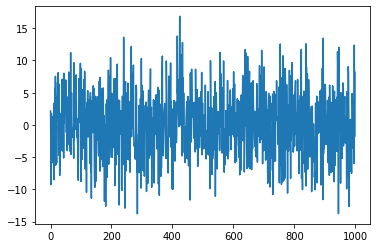

In [2]:
serie1 = [random.gauss(0, 5) for i in range(1000)]
plt.plot(serie1);

### série linéaire y(t) = a*t+b

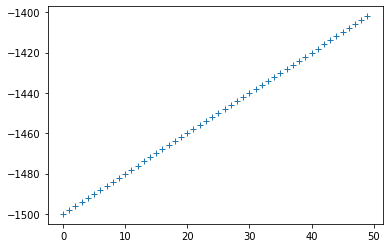

In [185]:
a, b = 2, -1500
serie2 = [a*t+b for t in range(50)]
plt.plot(serie2, '+');

### série oscillante y(t) = A * sin(omega*t+fi)

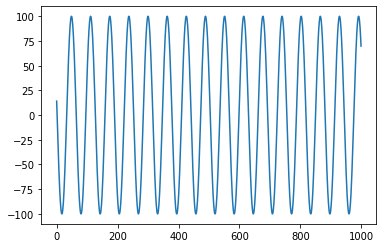

In [4]:
A, omega, fi = 100, 0.1, 3
serie3 = [A*sin(omega*t+fi) for t in range(1000)]
plt.plot(serie3);

### additionner la série 2) et la 3)

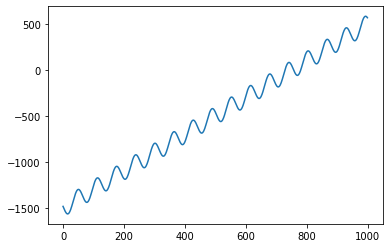

In [5]:
serie6 = [serie2[i] + serie3[i]
               for i in range(len(serie2))]
plt.plot(serie6);

### multiplier la série 2) et la 3)

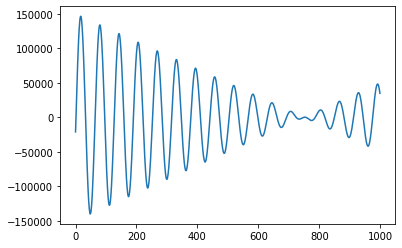

In [6]:
serie7 = [serie2[i] * serie3[i]
               for i in range(len(serie2))]
plt.plot(serie7);

### ajouter la série 1) * coefficient à la série 6)

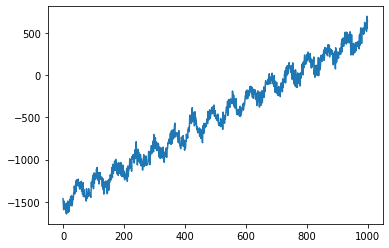

In [7]:
serie8 = [10*serie1[i] + serie6[i]
               for i in range(len(serie1))]
plt.plot(serie8);

### mulltiplier la série 7) par la série 1)

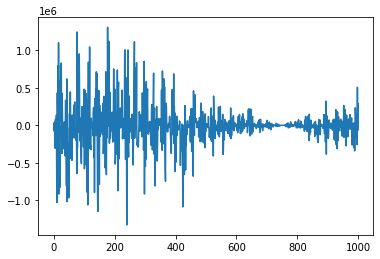

In [8]:
serie9 = [serie1[i] * serie7[i]
               for i in range(len(serie1))]
plt.plot(serie9);

## Décomposition temporelle

### décomposer les séries 2) et 3)
-> retrouver a, b, A, omega, fi

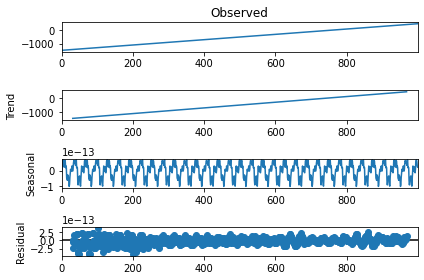

In [9]:
result8 = seasonal_decompose(serie2, period=int(2*pi/omega), model='additive')
result8.plot();

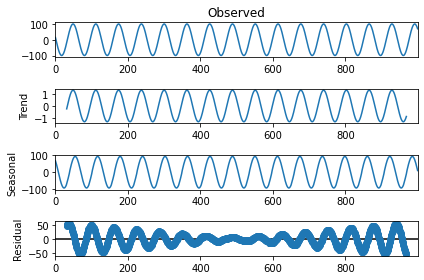

In [10]:
result8bis = seasonal_decompose(serie3, period=int(2*pi/omega), model='additive')
result8bis.plot();

### décomposer les séries 8) et 9)
-> retrouver a, b, A, omega, fi

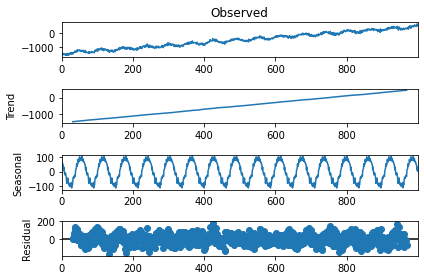

In [11]:
result9 = seasonal_decompose(serie8, period=int(2*pi/omega), model='additive')
result9.plot();

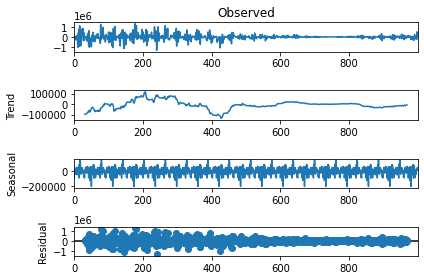

In [12]:
result9bis = seasonal_decompose(serie9, period=int(2*pi/omega), model='additive')
result9bis.plot();

### voir ce qu'il se passe quand le coefficient du bruit devient très grand

-> le bruit est trop gênant est on le retrouve dans le trend et la saisonnalité

## Analyse de corrélation

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### série gaussienne

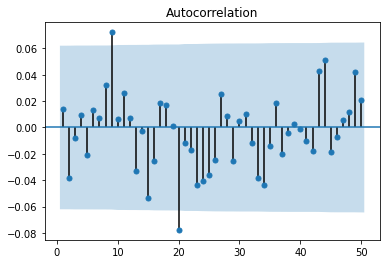

In [41]:
plot_acf(serie1, lags=50, zero=False);

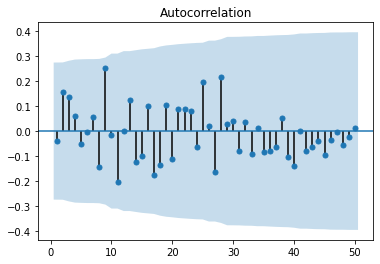

In [40]:
plot_acf(serie1[:51], lags=50, zero=False);

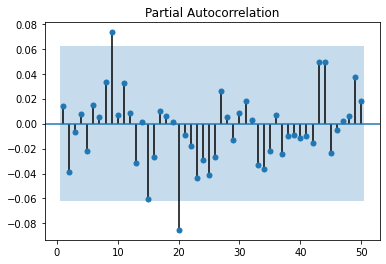

In [42]:
plot_pacf(serie1, lags=50, zero=False);

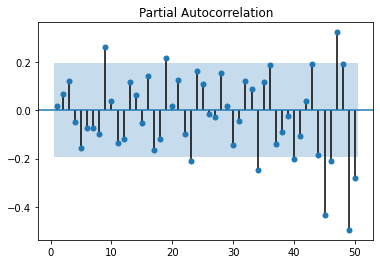

In [44]:
plot_pacf(serie1[:101], lags=50, zero=False);

### série linaire

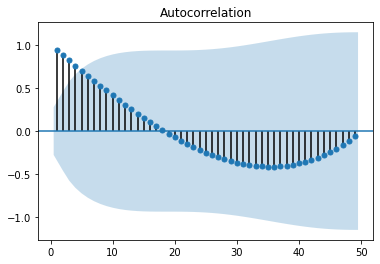

In [188]:
plot_acf(serie2, lags=49, zero=False);

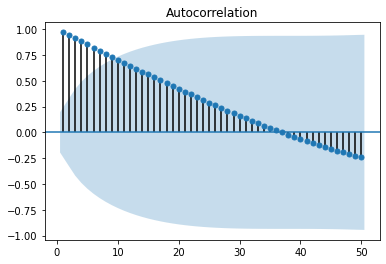

In [178]:
plot_acf(serie2[:101], lags=50, zero=False);

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1398: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (x[0:-k] * x[k:]).sum() / (n - k * adj_needed)


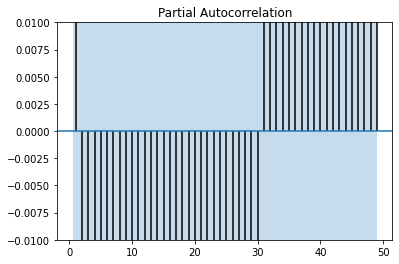

In [186]:
plot_pacf(serie2, lags=50, zero=False);
plt.ylim(-0.01,0.01);

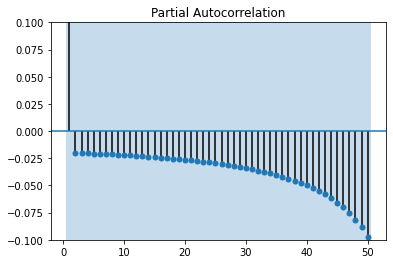

In [55]:
plot_pacf(serie2[:101], lags=50, zero=False);
plt.ylim(-0.1,0.1);

### série oscillante

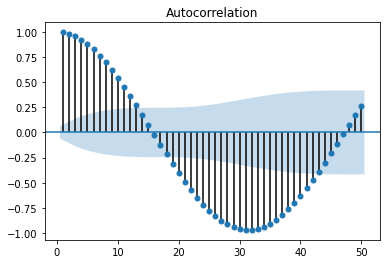

In [69]:
plot_acf(serie3, lags=50, zero=False);

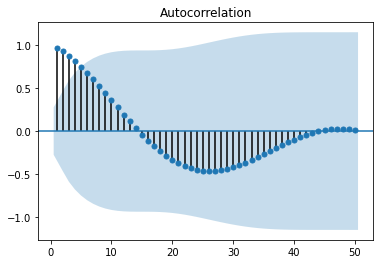

In [57]:
plot_acf(serie3[:51], lags=50, zero=False);

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


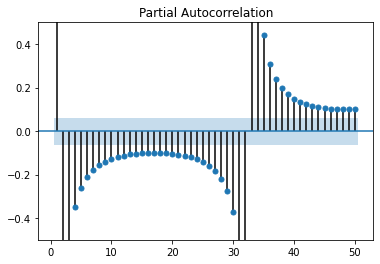

In [68]:
plot_pacf(serie3, lags=50, zero=False);
plt.ylim(-0.5,0.5);

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


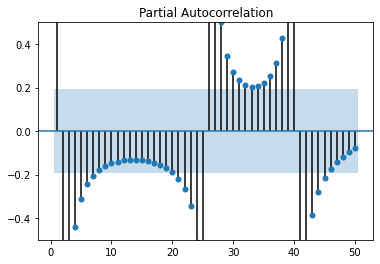

In [67]:
plot_pacf(serie3[:101], lags=50, zero=False);
plt.ylim(-0.5,0.5);

### série avec bruit

In [194]:
#serie = serie9
serie = result9bis.observed[100:-100]

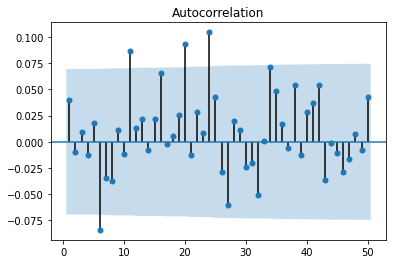

In [195]:
plot_acf(serie, lags=50, zero=False);

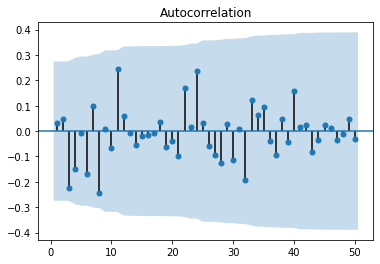

In [196]:
plot_acf(serie[:51], lags=50, zero=False);

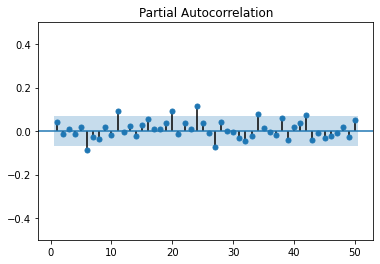

In [197]:
plot_pacf(serie, lags=50, zero=False);
plt.ylim(-0.5,0.5);

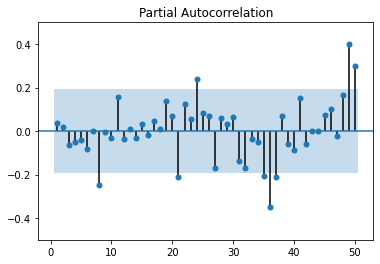

In [198]:
plot_pacf(serie[:101], lags=50, zero=False);
plt.ylim(-0.5,0.5);

### série arima process

In [201]:
import statsmodels.api as sm
import numpy as np

In [211]:
ar = np.array([1, 0.5, 0.2])
ma = np.array([1, 0.7, 0.1])
arma_process = sm.tsa.ArmaProcess(ar, ma)

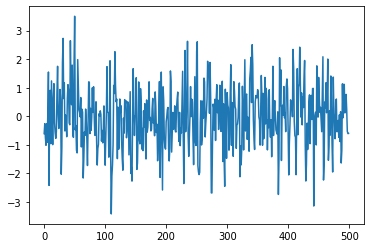

In [216]:
y = arma_process.generate_sample(500)
plt.plot(y);

In [217]:
serie = y

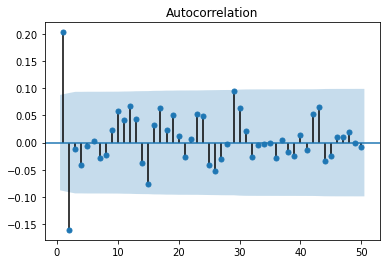

In [218]:
plot_acf(serie, lags=50, zero=False);

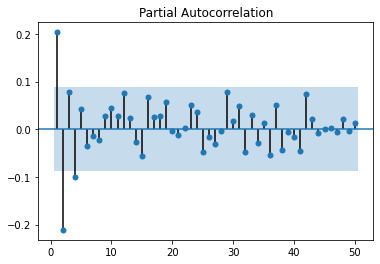

In [219]:
plot_pacf(serie, lags=50, zero=False);